# Basic ML project

This example shows how to build a Machine Learning pipeline using the Spec API.

Take a look at the `pipeline.yaml` for more details.

## Setup

(**Note**: Only required if you are running this example in your computer, not
required if using Binder/Deepnote)

~~~bash
# make sure you are in the ml-basic folder.
conda env create --file environment.yml
conda activate ml-basic
~~~

## Description

In [1]:
%%sh
%%bash
ploomber plot

Plot saved at: pipeline.png


sh: line 1: fg: no job control
100%|██████████| 4/4 [00:00<00:00, 8905.10it/s]


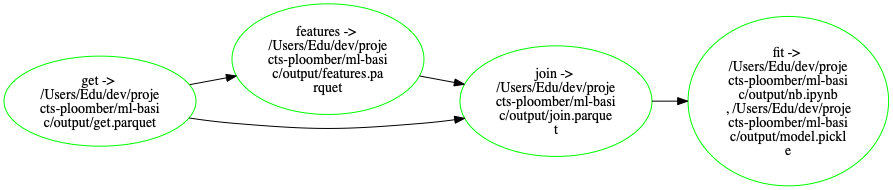

In [2]:
from IPython.display import Image
Image(filename='pipeline.png')

In [3]:
%%sh
%%bash
ploomber status

name      Last run      Outdated?    Product        Doc (short)    Location
--------  ------------  -----------  -------------  -------------  -------------
get       21 hours ago  False        /Users/Edu/de  Get data       /Users/Edu/de
          (Nov 20, 20                v/projects-                   v/projects-
          at 16:15)                  ploomber/ml-b                 ploomber/ml-b
                                     asic/output/g                 asic/tasks.py
                                     et.parquet                    :6
features  21 hours ago  False        /Users/Edu/de  Generate new   /Users/Edu/de
          (Nov 20, 20                v/projects-    features from  v/projects-
          at 16:15)                  ploomber/ml-b  existing       ploomber/ml-b
                                     asic/output/f  columns        asic/tasks.py
                                     eatures.parqu                 :20
                                     et
join      21 hours

sh: line 1: fg: no job control
100%|██████████| 4/4 [00:00<00:00, 9243.65it/s]


## Executing the pipeline from the command line (shell)

In [4]:
%%sh
%%bash
ploomber build

name      Ran?      Elapsed (s)    Percentage
--------  ------  -------------  ------------
get       False               0             0
features  False               0             0
join      False               0             0
fit       False               0             0


sh: line 1: fg: no job control
100%|██████████| 4/4 [00:00<00:00, 8132.44it/s]
0it [00:00, ?it/s]


Output is generated in the ``output/`` directory.

## Interacting with your pipeline from Python session

In [5]:
from ploomber.spec import DAGSpec

dag = DAGSpec('pipeline.yaml').to_dag()
dag.status()

name,Last run,Outdated?,Product,Doc (short),Location
get,"21 hours ago (Nov 20, 20 at 16:15)",False,/Users/Edu/dev /projects- ploomber/ml-ba sic/output/get .parquet,Get data,/Users/Edu/dev /projects- ploomber/ml-ba sic/tasks.py:6
features,"21 hours ago (Nov 20, 20 at 16:15)",False,/Users/Edu/dev /projects- ploomber/ml-ba sic/output/fea tures.parquet,Generate new features from existing columns,/Users/Edu/dev /projects- ploomber/ml-ba sic/tasks.py:2 0
join,"21 hours ago (Nov 20, 20 at 16:15)",False,/Users/Edu/dev /projects- ploomber/ml-ba sic/output/joi n.parquet,Join raw data with generated features,/Users/Edu/dev /projects- ploomber/ml-ba sic/tasks.py:2 9
fit,"18 hours ago (Nov 20, 20 at 19:12)",False,"{'nb': File(/U sers/Edu/dev/p rojects- ploomber/ml-ba sic/output/nb. ipynb), 'model': File( /Users/Edu/dev /projects- ploomber/ml-ba sic/output/mod el.pickle)}",Script trains a model,/Users/Edu/dev /projects- ploomber/ml- basic/fit.py


In [6]:
dag.build()

name,Ran?,Elapsed (s),Percentage
get,False,0,0
features,False,0,0
join,False,0,0
fit,False,0,0


``DAG`` has a dict-like interface, to get a task:

In [7]:
dag['fit']

NotebookRunner: fit -> MetaProduct({'nb': File(/Users/Edu/dev/projects-ploomber/ml-basic/output/nb.ipynb), 'model': File(/Users/Edu/dev/projects-ploomber/ml-basic/output/model.pickle)})

There are a lot of things you can do with from a Python session, see the
documentation for ``ploomber.DAG`` for details.

A shortcut to initialize a Python session from a terminal:

~~~bash
ploomber interact
~~~

## Where to go from here

[`ml-intermediate/`](../ml-intermediate/README.ipynb) contains another ML
pipeline with more features. It shows how
to parametrize a pipeline using an `env.yaml` file (so you can run your pipeline
with a small sample to test things quickly), run integration tests using
`on_finish` and customizing output notebooks/reports.

In [8]:
# Parameters
product = "ml-basic/README.ipynb"
